# Data exploration 

Anomaly detection highly depends on the data, since we have to define everything from the metrics to the model used to define the anomalies. 
It's why it is necessary to perform a data exploration here, that will advise the guidelines for the anomaly detection pattern that I will define in the conclusion.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We first transform our dataframe in order to simplify its later use.

In [11]:
dataset = pd.read_csv('data/dataset.csv')
dataset[['day', 'cycle', 'window']] = dataset['day_cycle_window'].str.split('_', expand=True)
dataset.index = dataset['day_cycle_window']
dataset = dataset[['day', 'cycle', 'window'] + [col for col in dataset.columns if col not in ['day_cycle_window', 'day', 'cycle', 'window']]]

dataset.head()

,day,cycle,window,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11
day_cycle_window,,,,,,,,,,,,,,
1_1_1,1,1,1,-0.805191,-1.141993,-1.328327,-1.516693,-1.373962,-0.80827,-1.070547,-0.504352,2.807146,0.495528,-1.246737
1_1_1,1,1,1,-0.805191,-1.134902,-1.320393,-1.505848,-1.361560,-0.80784,-1.064212,-0.516000,2.894177,0.494467,-1.244472
1_1_1,1,1,1,-0.805191,-1.117304,-1.307167,-1.505848,-1.361560,-0.80784,-1.064212,-0.516000,2.981904,0.429370,-1.244472
1_1_1,1,1,1,-0.814231,-1.114206,-1.287593,-1.442302,-1.287565,-0.80784,-1.045557,-0.516000,3.063298,0.348056,-1.244472
1_1_1,1,1,1,-0.848104,-1.112276,-1.285393,-1.429076,-1.270722,-0.80784,-1.017575,-0.664906,3.049237,0.118828,-1.270237


In [12]:
dataset.groupby(['day', 'cycle']).agg({'window': 'nunique'})

window
day cycle        
1   1          68
    2         181
    3           6
    4          17
    5          94
2   1         181
    2          76
    3         145
3   1         181
    2          52
    3         181
4   1          49
    2         181
    3          65
    4         160

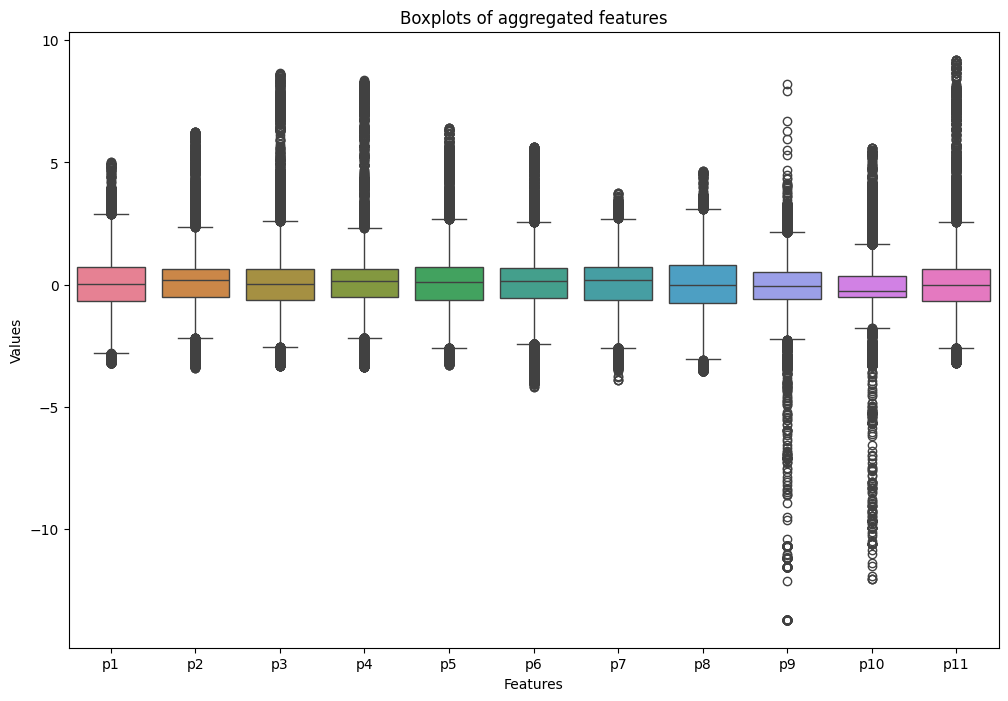

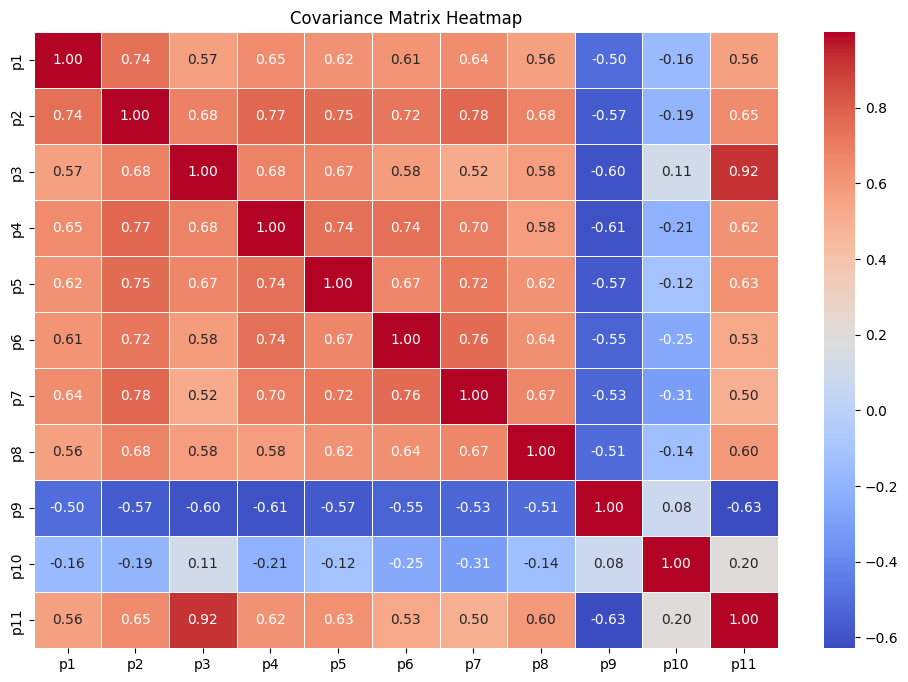

In [9]:
features = dataset.columns[3:]
parameters = dataset.columns[:3]

plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset[features])
plt.title('Boxplots of aggregated features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(12, 8))
covariance_matrix = dataset[features].cov()
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

The covariance matrix shows the existence of a positive correlation between all parameters, except for parameters 9 and 10.

This difference in behavior should be kept in mind during our multivariate anomaly analysis. Indeed, an anomaly in parameters 9 and 10 may not have the same impact on an overall metric.

The special behavior of these two parameters is also shown in the boxplots. Indeed, in spite of having similar characteristic values, the extreme values seem to be more spread out than for the other parameters.

Let's now have a look on the influence of the cycle and the day on the window of interest.

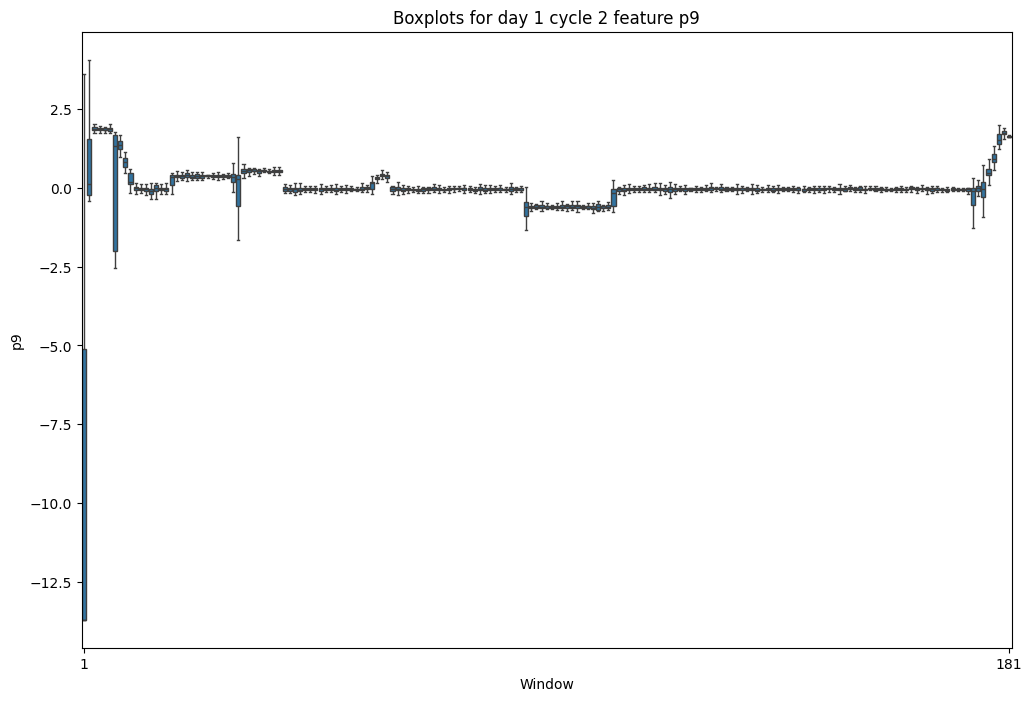

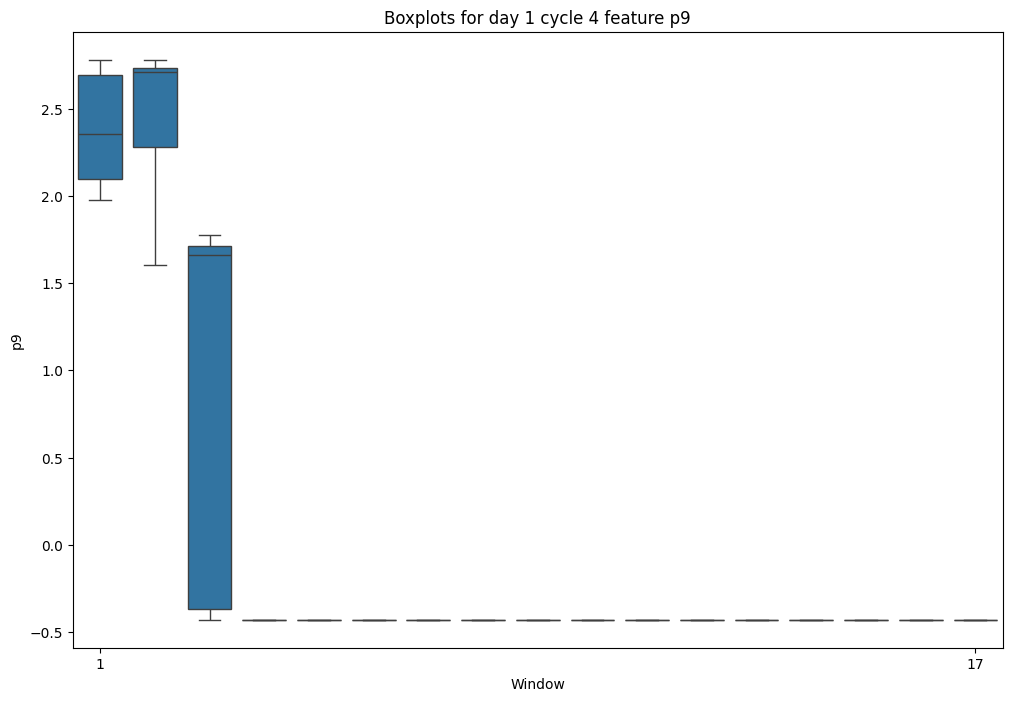

In [13]:
##### Visual study with a variable cycle #####
day = np.random.choice(dataset['day'].unique())
cycles = np.random.choice(dataset[dataset['day'] == day]['cycle'].unique(), size=2, replace=False)
cycle1, cycle2 = cycles
feature = np.random.choice(features)

##### Interesting value #####
day = '1'
cycle1, cycle2 = '2', '4'
feature = 'p9'

plt.figure(figsize=(12, 8))
sns.boxplot(x='window', y=feature, data=dataset[(dataset['day'] == day) & (dataset['cycle'] == cycle1)], showfliers=False)
plt.title(f'Boxplots for day {day} cycle {cycle1} feature {feature}')
plt.xlabel('Window')
plt.ylabel(feature)
xticks = plt.xticks()[0]
plt.xticks([xticks[0], xticks[-1]])
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='window', y=feature, data=dataset[(dataset['day'] == day) & (dataset['cycle'] == cycle2)], showfliers=False)
plt.title(f'Boxplots for day {day} cycle {cycle2} feature {feature}')
plt.xlabel('Window')
plt.ylabel(feature)
xticks = plt.xticks()[0]
plt.xticks([xticks[0], xticks[-1]])
plt.show()

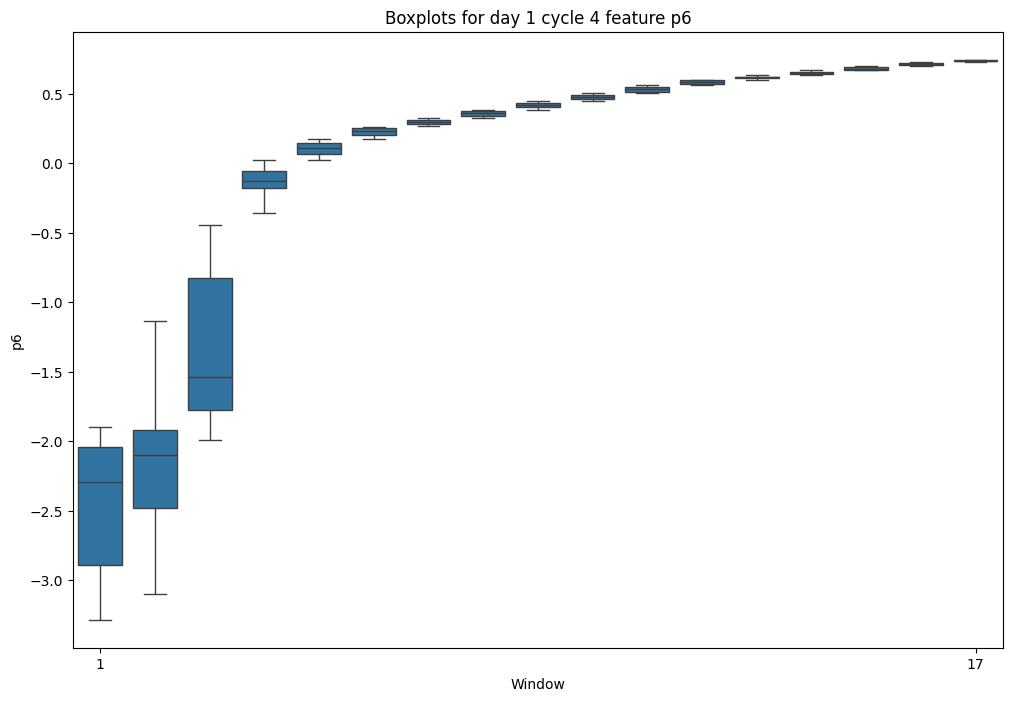

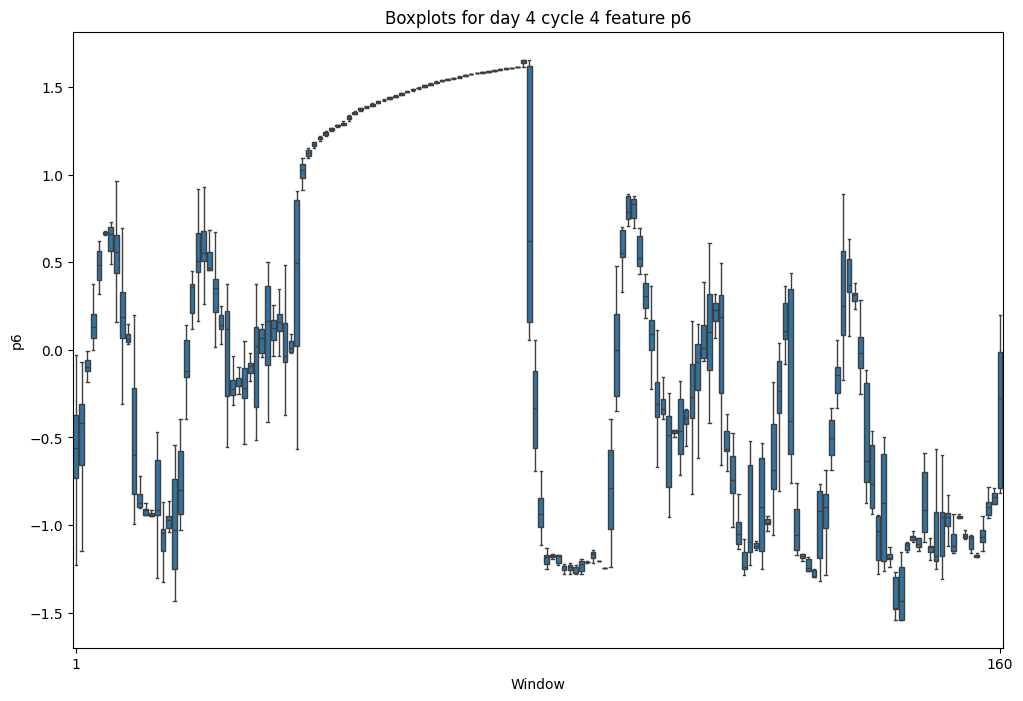

In [14]:
##### Visual study with a variable day #####
cycle = np.random.choice(dataset['cycle'].unique())
feature = np.random.choice(features)
days = np.random.choice(dataset[dataset['cycle'] == cycle]['day'].unique(), size=2, replace=False)
day1, day2 = days

##### Interesting value #####
cycle = '4'
day1, day2 = '1', '4'
feature = 'p6'

plt.figure(figsize=(12, 8))
sns.boxplot(x='window', y=feature, data=dataset[(dataset['day'] == day1) & (dataset['cycle'] == cycle)], showfliers=False)
plt.title(f'Boxplots for day {day1} cycle {cycle} feature {feature}')
plt.xlabel('Window')
plt.ylabel(feature)
xticks = plt.xticks()[0]
plt.xticks([xticks[0], xticks[-1]])
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='window', y=feature, data=dataset[(dataset['day'] == day2) & (dataset['cycle'] == cycle)], showfliers=False)
plt.title(f'Boxplots for day {day2} cycle {cycle} feature {feature}')
plt.xlabel('Window')
plt.ylabel(feature)
xticks = plt.xticks()[0]
plt.xticks([xticks[0], xticks[-1]])
plt.show()

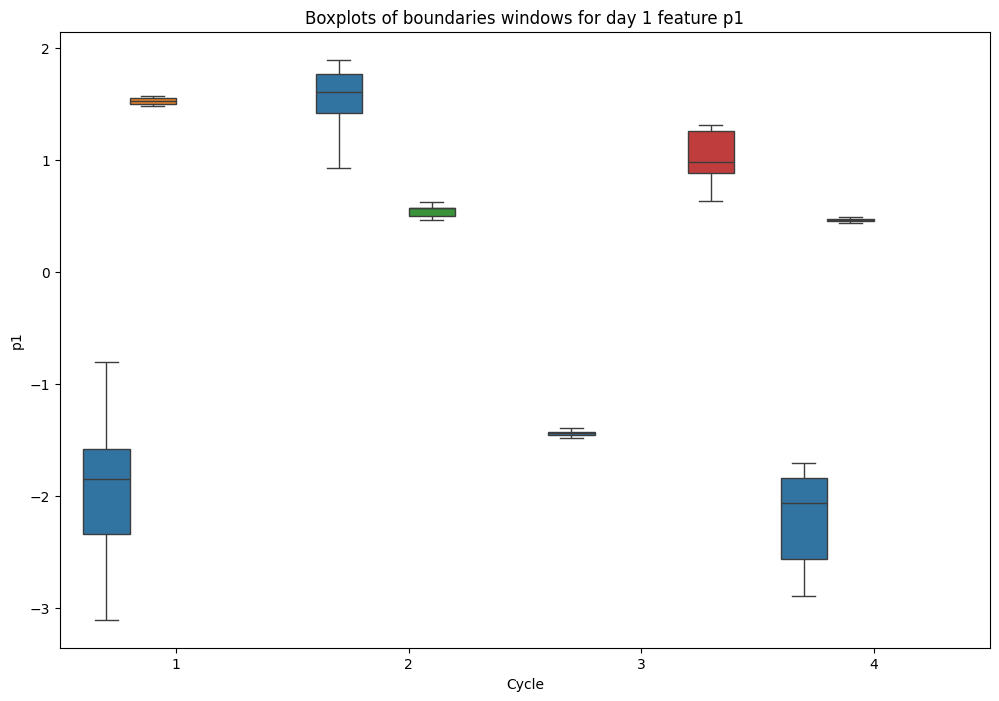

In [15]:
##### Check if the windows on the boundaries are different #####
# We could check more than just the only two boundaries, but I just want to see here if there is any kind of continuity

day = np.random.choice(dataset['day'].unique())
feature = np.random.choice(features)
cycles = dataset[dataset['day'] == day]['cycle'].unique()

##### Interesting value #####
day = '1'
feature = 'p1'

dataframe_with_boundaries = pd.DataFrame()
for cycle in cycles:
    first_window = dataset[(dataset['day'] == day) & (dataset['cycle'] == cycle)]['window'].min()
    last_window = dataset[(dataset['day'] == day) & (dataset['cycle'] == cycle)]['window'].max()
    dataframe_with_boundaries = pd.concat([dataframe_with_boundaries, dataset[(dataset['day'] == day) & (dataset['cycle'] == cycle) & ((dataset['window'] == first_window) | (dataset['window'] == last_window))]])

plt.figure(figsize=(12, 8))
sns.boxplot(x='cycle', y=feature, hue='window', data=dataframe_with_boundaries, showfliers=False, legend=False)
plt.title(f'Boxplots of boundaries windows for day {day} feature {feature}')
plt.xlabel('Cycle')
plt.ylabel(feature)
plt.show()

This first visual analysis is very interesting:
1. Overall, distributions of different day, cycle and parameters are totally different.
2. The dispersions of the values of each window is highly dependant on the given day, cycle and parameter.
3. There is a sort of continuity in the behaviors of the windows inside a given cycle, that agrees with our choice to consider them inside of a cycle. This continuity does not seem to persist across cycles of a given day as suggested by the previous graph.
4. As depicted by the two pairs of previous plots, data distributions follow shapes that depend, given a certain parameter, of both the cycle and the day considered.
5. Interestingly, some parameters of the same cycle share the same distribution for certain values of (day, cycle): e.g. the parameters 6 and 8 have roughly the same distribution for the pair (1, 4) and even (4, 4).

So we clearly have to take into account the day and the cycle in our study, without blindly plotting all the parameters data as we did in the beginning.

## Guidelines

The point 5 shows that there is a strong correlation between the parameters, which we already saw in the global picture at the beginning. This will motivate our choice to perform a dimension reduction with PCA.

The points 1, 2, 3 and also 4 motivate us to work for a given day and cycle. This is also coherent with the nature of the problem. Indeed, if we detect an anomaly for a given day, cycle, parameter, we are going to advise our expert to look carefully at the following graphs. If an anomaly occurs, it might be because of a broken sensor that will not be repaired for the following cycles.

The point 4 shows the possible existence of analytical expressions for the graphs of the different parameters. 

Finally, the strongest choice I take is to characterize each window by its mean value. Many more alternatives could be chosen, but I made this strong choice for simplicity and because the spread of most of the windows is limited, as seen in the previous boxplots, so the collapse of the information into the mean is OK.

## Limits of my work and discussions

In the context of data coming from different sensors, an univariate study for each parameter could also be interesting. It actually depends on the type of anomaly we want to detect. If we want to detect the failure of a sensor, the univariate study makes more sense because the failure of one sensor won't impact the behavior of the other sensors.

The univariate study could take benefit of the 'shapes' of the different functions, which is not directly taken into account with the methods studied in class.

I have opted for studying the multivariate case, so the anomaly here is more something like abnormal weather conditions, networking issues, communication failures... These are anomalies that would concern not only a single sensor.
This choice also make it possible to use all the strategies seen in class. 
I will not use the novelty detection methods because we do not have a clear definition of the truth in this study.